In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy
from astropy.table import Table

In [2]:
zspec = Table.read('MPhys/gpz_files/PRED_20_split.cat',format = 'ascii.commented_header')
#zphot = Table.read('MPhys/gpz_files/gpz_jwst_2.cat',format = 'ascii.commented_header')
z = np.array(zspec['z_spec'])

z

array([1.1957, 0.6913, 0.8927, ..., 2.2236, 0.7941, 1.3385])

In [9]:


zspec_lst =[]
file_zspec = open('MPhys/gpz_files/jwst_TRAIN_2.cat','r')
#file_zspec['VALUE']
for _ in range(1):
    next(file_zspec)
for line in file_zspec:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
   
    zspec_lst.append(float(tokens[13]))

zspec_arr = np.array(zspec_lst)       

In [10]:
print(zspec_lst)

[9.999, 6.82, 6.79, 6.7, 6.6357, 6.5658, 6.5318, 6.4, 6.396, 6.3848, 6.3097, 6.1852, 6.118, 6.1071, 6.1, 6.1, 6.041, 6.0, 6.0, 5.9776, 5.968, 5.95, 5.94, 5.9365, 5.9321, 5.926, 5.9219, 5.9209, 5.9, 5.8931, 5.8931, 5.8922, 5.8891, 5.869, 5.868, 5.8, 5.8, 5.793, 5.781, 5.777, 5.7645, 5.75, 5.7, 5.697, 5.681, 5.676, 5.671, 5.641, 5.6, 5.583, 5.5828, 5.559, 5.541, 5.5249, 5.5203, 5.5, 5.4981, 5.478, 5.4716, 5.4715, 5.44, 5.42, 5.415, 5.4, 5.39, 5.386, 5.3811, 5.37, 5.3552, 5.3212, 5.3101, 5.2963, 5.2811, 5.2698, 5.2601, 5.2597, 5.226, 5.2244, 5.1874, 5.1629, 5.1496, 5.14, 5.1372, 5.1362, 5.1341, 5.1322, 5.13, 5.13, 5.126, 5.121, 5.12, 5.114, 5.08, 5.074, 5.07, 5.0549, 5.0539, 5.0313, 5.0293, 5.0032, 5.0, 5.0, 4.988, 4.98, 4.965, 4.96, 4.948, 4.9469, 4.9397, 4.9381, 4.9367, 4.9304, 4.9077, 4.9, 4.9, 4.9, 4.9, 4.896, 4.893, 4.8893, 4.879, 4.879, 4.8761, 4.8759, 4.869, 4.86, 4.8451, 4.835, 4.833, 4.8327, 4.832, 4.8272, 4.8236, 4.8235, 4.823, 4.814, 4.8111, 4.811, 4.8101, 4.8095, 4.8081, 4.803

In [12]:
#covs = ['GPVC','GPGD']
#fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True)
#for cov in covs:#
#for numbf in np.linspace(10,100,4, dtype=int):#np.linspace(100,500,9, dtype=int):
zphot = []
error=[]


file = open('MPhys/gpz_files/gpz_jwst_2.cat','r')
for _ in range(11):
    next(file)
for line in file:
    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    zphot.append(float(tokens_numbf[0]))
    #error.append(float(tokens_numbf[1])/float(1+float(tokens[10])))
#data = np.array((zspec_lst, zphot, error))
   # plt.hexbin(data[0],data[1],gridsize= 300,cmap = 'inferno', alpha= 1, bins='log')   
    #plt.xlabel('Spectroscopic Redshift (z)')
    #plt.ylabel('Photometric Redshift (z)')
    #plt.errorbar(data[0],data[1], yerr = data[2], fmt = 'o', alpha = 0.2, color = 'darkviolet')
    #x = np.linspace(0,1.4,10)
    #plt.plot(x,x, linestyle = '--', color = 'k')

    #plt.title(str(numbf)+ ' Base Functions')
    
    #plt.hexbin(data[0],data[1],gridsize= 100, cmap = 'inferno_r', alpha= 1, bins='log')
    
    
    #plt.ylim(0,1.75)
    #plt.xlim(0,1.75)

    #cbar = plt.colorbar()
    #cbar.ax.get_yaxis().labelpad = 15
    #cbar.ax.set_ylabel('Median Weight', rotation=270)
    #plt.savefig('MPhys/parameter_plots/numbf/'+str(numbf)+' base_functions.png', bbox_inches='tight')
    #plt.show()
    #plt.close()  




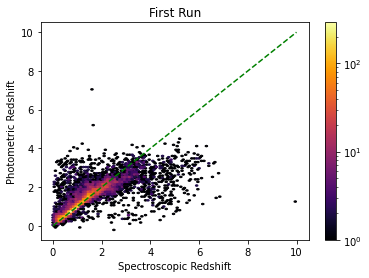

In [13]:
fig,ax= plt.subplots(1,1)
x = np.linspace(np.min(zspec_lst),np.max(zspec_lst),50)
plt.hexbin(zspec_lst, zphot,gridsize=100,cmap = 'inferno',bins='log')
plt.plot(x,x,color = 'g',linestyle = '--')
plt.xlabel('Spectroscopic Redshift')
plt.ylabel('Photometric Redshift')
#plt.xlim(0,8)
#plt.ylim(0,8)
plt.title('First Run')
plt.colorbar()
plt.savefig('MPhys/gpz_files/z_compare_run1.png')

In [52]:
##difference between diagonal and full covarience
zphot_full = []
error_full=[]

file = open(f'MPhys/parameter_files/gpz_GPGC.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_full.append(float(tokens_numbf[0]))
    error_full.append(float(tokens_numbf[1])/float(1+float(tokens[10])))

file.close()

In [53]:
##difference between diagonal and full covarience
zphot_diag = []
error_diag=[]

file = open(f'MPhys/parameter_files/gpz_nbf150.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_diag.append(float(tokens_numbf[0]))
    
    error_diag.append(float(tokens_numbf[1])/float(1+float(tokens[10])))

file.close()


In [54]:
highdiff=[]
diff=[]
tst=[]
a=[]
for i in range(len(zphot_diag)):
    diff.append(abs(zphot_diag[i]-zphot_full[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff)):
    #tst.append((zphot_diag[j]*0.02))
    if diff[j]>=((1+zphot_diag[j])*0.2):
        if diff[j]>0:
            highdiff.append(j)


In [55]:
new_gpvd=[]
new_gpvd_err=[]
new_gpvc=[]
new_gpvc_err=[]
new_zspec=[]
for k in highdiff:
    if k>0:
        new_gpvd.append(zphot_diag[k])
        new_gpvd_err.append(error_diag[k])
        
        new_gpvc.append(zphot_full[k])
        new_gpvc_err.append(error_full[k])
        new_zspec.append(zspec[k])
        
        
new_data_diag = np.array((new_gpvd,new_zspec,new_gpvd_err ))
new_data_full = np.array((new_gpvc,new_zspec,new_gpvc_err ))


2869


In [47]:
print(new_gpvd[0],new_zspec[0])
fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
ax[0].hexbin(new_data_full[0] , new_data_diag[1],cmap = 'autumn',bins='log')
ax[1].hexbin(new_data_diag[0] , new_data_diag[1],cmap='winter',bins='log')
ax[2].hexbin(new_data_diag[0] , new_data_diag[1],cmap='winter',bins='log')
ax[2].hexbin(new_data_full[0] , new_data_diag[1],cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')


fig.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
plt.xlim(0,1)
plt.ylim(0,1)
plt.savefig('MPhys/diag_full_cov_difference_10pc.png')
plt.close()

0.1556116 0.12077


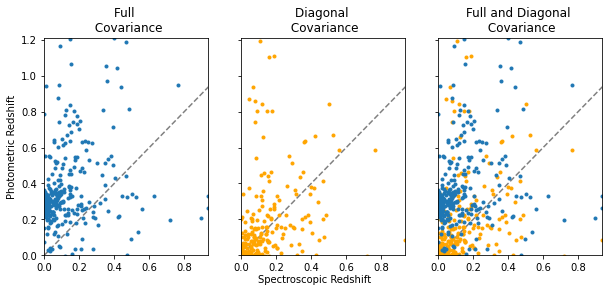

In [63]:
x=np.linspace(0,np.max(new_data_full[0]),20)

fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
fig.text(0.5, 0.04, 'Spectroscopic Redshift', ha='center', va='center')
#a.set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
ax[0].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
ax[1].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].plot(x,x,linestyle = '--', color = 'grey')
ax[1].plot(x,x,linestyle = '--', color = 'grey')
ax[2].plot(x,x,linestyle = '--', color = 'grey')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')

plt.xlim(0,np.max(new_data_full[1]))
plt.ylim(0,np.max(new_data_full[0]))
plt.savefig('MPhys/parameter_plots/full_vs_diag.png')

(0.0, 1.2)

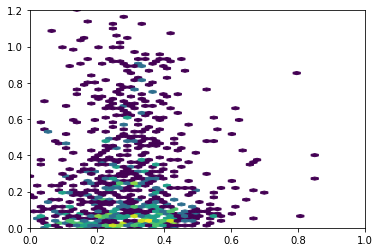

In [12]:
plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
plt.xlim(0,1)
plt.ylim(0,1.2)

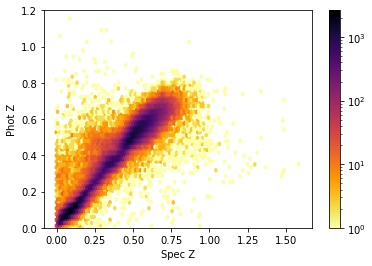

In [38]:
plt.xlabel('Spec Z')
plt.ylabel('Phot Z')
#plt.errorbar(data[0],data[1], yerr = data[2], fmt = 'o', alpha = 0.08)
plt.hexbin(data[0],data[1],gridsize= 100, cmap = 'inferno_r', alpha= 1, bins='log')


#plt.title('Plot for '+str(cov)+' Covarience')

#plt.xlim(0.,1)
plt.ylim(0,1.2)

plt.colorbar()
#plt.savefig('MPhys/'+str(cov)+' covarience_plot_scatter.png', bbox_inches='tight')


In [ ]:
#used if using log scales
#goodx =[]
#goody=[]
#gooderr =[]
#for i in range(len(data[0])):
#    if data[0][i]>0:
#        if data[1][i]>0:
#            if data[2][i]>0:
#                goodx.append(data[0][i])
#                goody.append(data[1][i])
#                gooderr.append(data[2][i])
#data_good = np.array((goodx,goody, gooderr))
#print(np.max(data_good[0]),np.min(data_good[0]))

        
